# I-GUIDE: Geospatial Data Science - Geopandas Basics
This Notebook shows the basics of pandas and geopandas. 
Further information can be found here:
 * https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html
 * https://geopandas.org/en/stable/docs/user_guide/data_structures.html
 * https://iguide.illinois.edu/projects/convergence-curriculum-for-geospatial-data-science/
 
A more advanced notebook using the same federal dam dataset that conducts a 
'Vulnerability Analysis for Aging Dam Infrastructure' can be found here:
 * https://iguide.illinois.edu/platform/discovery/

The following grey cells are "Code cells" to see the results you must run them by clicking on them and clicking the Run button (play button).
The run button can be found in the top navigation bar.

## 1. Import packages

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

import pandas as pd
import geopandas as gpd

## 2. Explore Dams dataset

In [2]:
fed_dams = pd.read_json("https://fim.sec.usace.army.mil/ci/fim/getAllEAPStructure")

In [3]:
fed_dams

,ID,LAT,LON,NAME,LIBRARY_ID,LIBRARY_TYPE
0,MA00964,42.118328,-71.908333,BUFFUMVILLE DAM,1117,dam_study
1,IL00005,40.671299,-89.500504,FARMDALE DAM,1113,dam_study
2,GA03742S001,34.112355,-84.713096,ALLATOONA DAM - SADDLE DIKE,1000,dam_study
3,KS00002S001,37.291890,-95.914999,ELK CITY DAM - ELK CITY LEVEE,1144,dam_study
4,CT00507S001,41.625600,-73.030588,HANCOCK BROOK DAM - RAILROAD DIKE,1444,dam_study
...,...,...,...,...,...,...
464,CA10303,38.718424,-123.009620,WARM SPRINGS DAM,6807,dam_study
465,OH00031,41.299999,-80.758331,MOSQUITO CREEK DAM,6367,dam_study
466,MN00582,46.669116,-94.112818,PINE RIVER DAM,5266,dam_study
467,MT00025,48.002228,-106.417987,FORT PECK DAM,7988,dam_study


In [4]:
geo_fed_dams = gpd.GeoDataFrame(fed_dams, geometry=gpd.points_from_xy(fed_dams['LON'], fed_dams['LAT'], crs="EPSG:4326"))


In [5]:
geo_fed_dams

,ID,LAT,LON,NAME,LIBRARY_ID,LIBRARY_TYPE,geometry
0,MA00964,42.118328,-71.908333,BUFFUMVILLE DAM,1117,dam_study,POINT (-71.90833 42.11833)
1,IL00005,40.671299,-89.500504,FARMDALE DAM,1113,dam_study,POINT (-89.50050 40.67130)
2,GA03742S001,34.112355,-84.713096,ALLATOONA DAM - SADDLE DIKE,1000,dam_study,POINT (-84.71310 34.11236)
3,KS00002S001,37.291890,-95.914999,ELK CITY DAM - ELK CITY LEVEE,1144,dam_study,POINT (-95.91500 37.29189)
4,CT00507S001,41.625600,-73.030588,HANCOCK BROOK DAM - RAILROAD DIKE,1444,dam_study,POINT (-73.03059 41.62560)
...,...,...,...,...,...,...,...
464,CA10303,38.718424,-123.009620,WARM SPRINGS DAM,6807,dam_study,POINT (-123.00962 38.71842)
465,OH00031,41.299999,-80.758331,MOSQUITO CREEK DAM,6367,dam_study,POINT (-80.75833 41.30000)
466,MN00582,46.669116,-94.112818,PINE RIVER DAM,5266,dam_study,POINT (-94.11282 46.66912)
467,MT00025,48.002228,-106.417987,FORT PECK DAM,7988,dam_study,POINT (-106.41799 48.00223)


<Axes: >

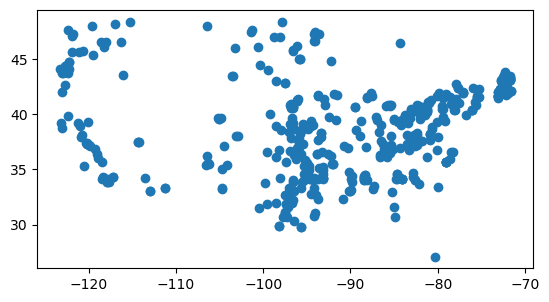

In [6]:
geo_fed_dams.plot()

## 3. Explore US Census Tract dataset

In [7]:
# Credit: https://pygis.io/docs/d_access_census.html
mn_tract = gpd.read_file("https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_27_tract.zip")

mn_tract = mn_tract.to_crs(epsg = 4326)

In [8]:
mn_tract

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,27,037,060716,27037060716,607.16,Census Tract 607.16,G5020,S,3782370,293049,+44.8242729,-093.1831161,"POLYGON ((-93.19843 44.82719, -93.19711 44.828..."
1,27,037,060717,27037060717,607.17,Census Tract 607.17,G5020,S,11760284,545256,+44.8465754,-093.1305462,"POLYGON ((-93.16410 44.83360, -93.16134 44.837..."
2,27,037,060710,27037060710,607.10,Census Tract 607.10,G5020,S,10212239,358264,+44.7779970,-093.3059622,"POLYGON ((-93.32978 44.77802, -93.32967 44.778..."
3,27,037,060711,27037060711,607.11,Census Tract 607.11,G5020,S,3572710,30615,+44.7582405,-093.2810093,"POLYGON ((-93.28919 44.76077, -93.28894 44.765..."
4,27,037,060713,27037060713,607.13,Census Tract 607.13,G5020,S,2840388,54332,+44.7602474,-093.2664153,"POLYGON ((-93.27809 44.75544, -93.27778 44.755..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,27,029,000100,27029000100,1,Census Tract 1,G5020,S,174180017,2869815,+47.5581793,-095.4580235,"POLYGON ((-95.55422 47.50033, -95.55382 47.507..."
1334,27,037,060709,27037060709,607.09,Census Tract 607.09,G5020,S,3773616,211132,+44.7590705,-093.3168753,"POLYGON ((-93.32873 44.76118, -93.32873 44.761..."
1335,27,021,960302,27021960302,9603.02,Census Tract 9603.02,G5020,S,152737466,33891035,+46.8999754,-094.3519257,"POLYGON ((-94.50222 46.84191, -94.50219 46.848..."
1336,27,021,960801,27021960801,9608.01,Census Tract 9608.01,G5020,S,90227986,38283033,+46.3718070,-094.3757989,"POLYGON ((-94.45657 46.35111, -94.45654 46.351..."


<Axes: >

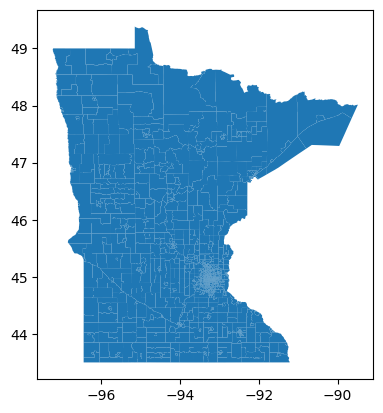

In [9]:
mn_tract.plot()

<Axes: >

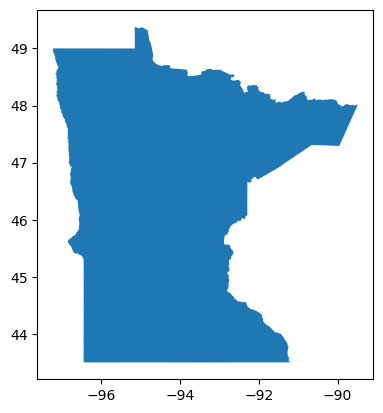

In [10]:
mn = mn_tract.dissolve()

In [ ]:
mn.plot()

In [16]:
## 4. You explore.
Go to the documentation: https://geopandas.org/en/stable/docs/user_guide/data_structures.html

SyntaxError: invalid syntax (2342976767.py, line 2)

In [11]:
mn.centroid

/tmp/ipykernel_763/379541566.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mn.centroid


0    POINT (-94.19835 46.34929)
dtype: geometry